In [3]:
import pandas as pd

In [4]:
df=pd.read_csv(r'Admission_Predict.csv')

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(400, 9)

In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [10]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

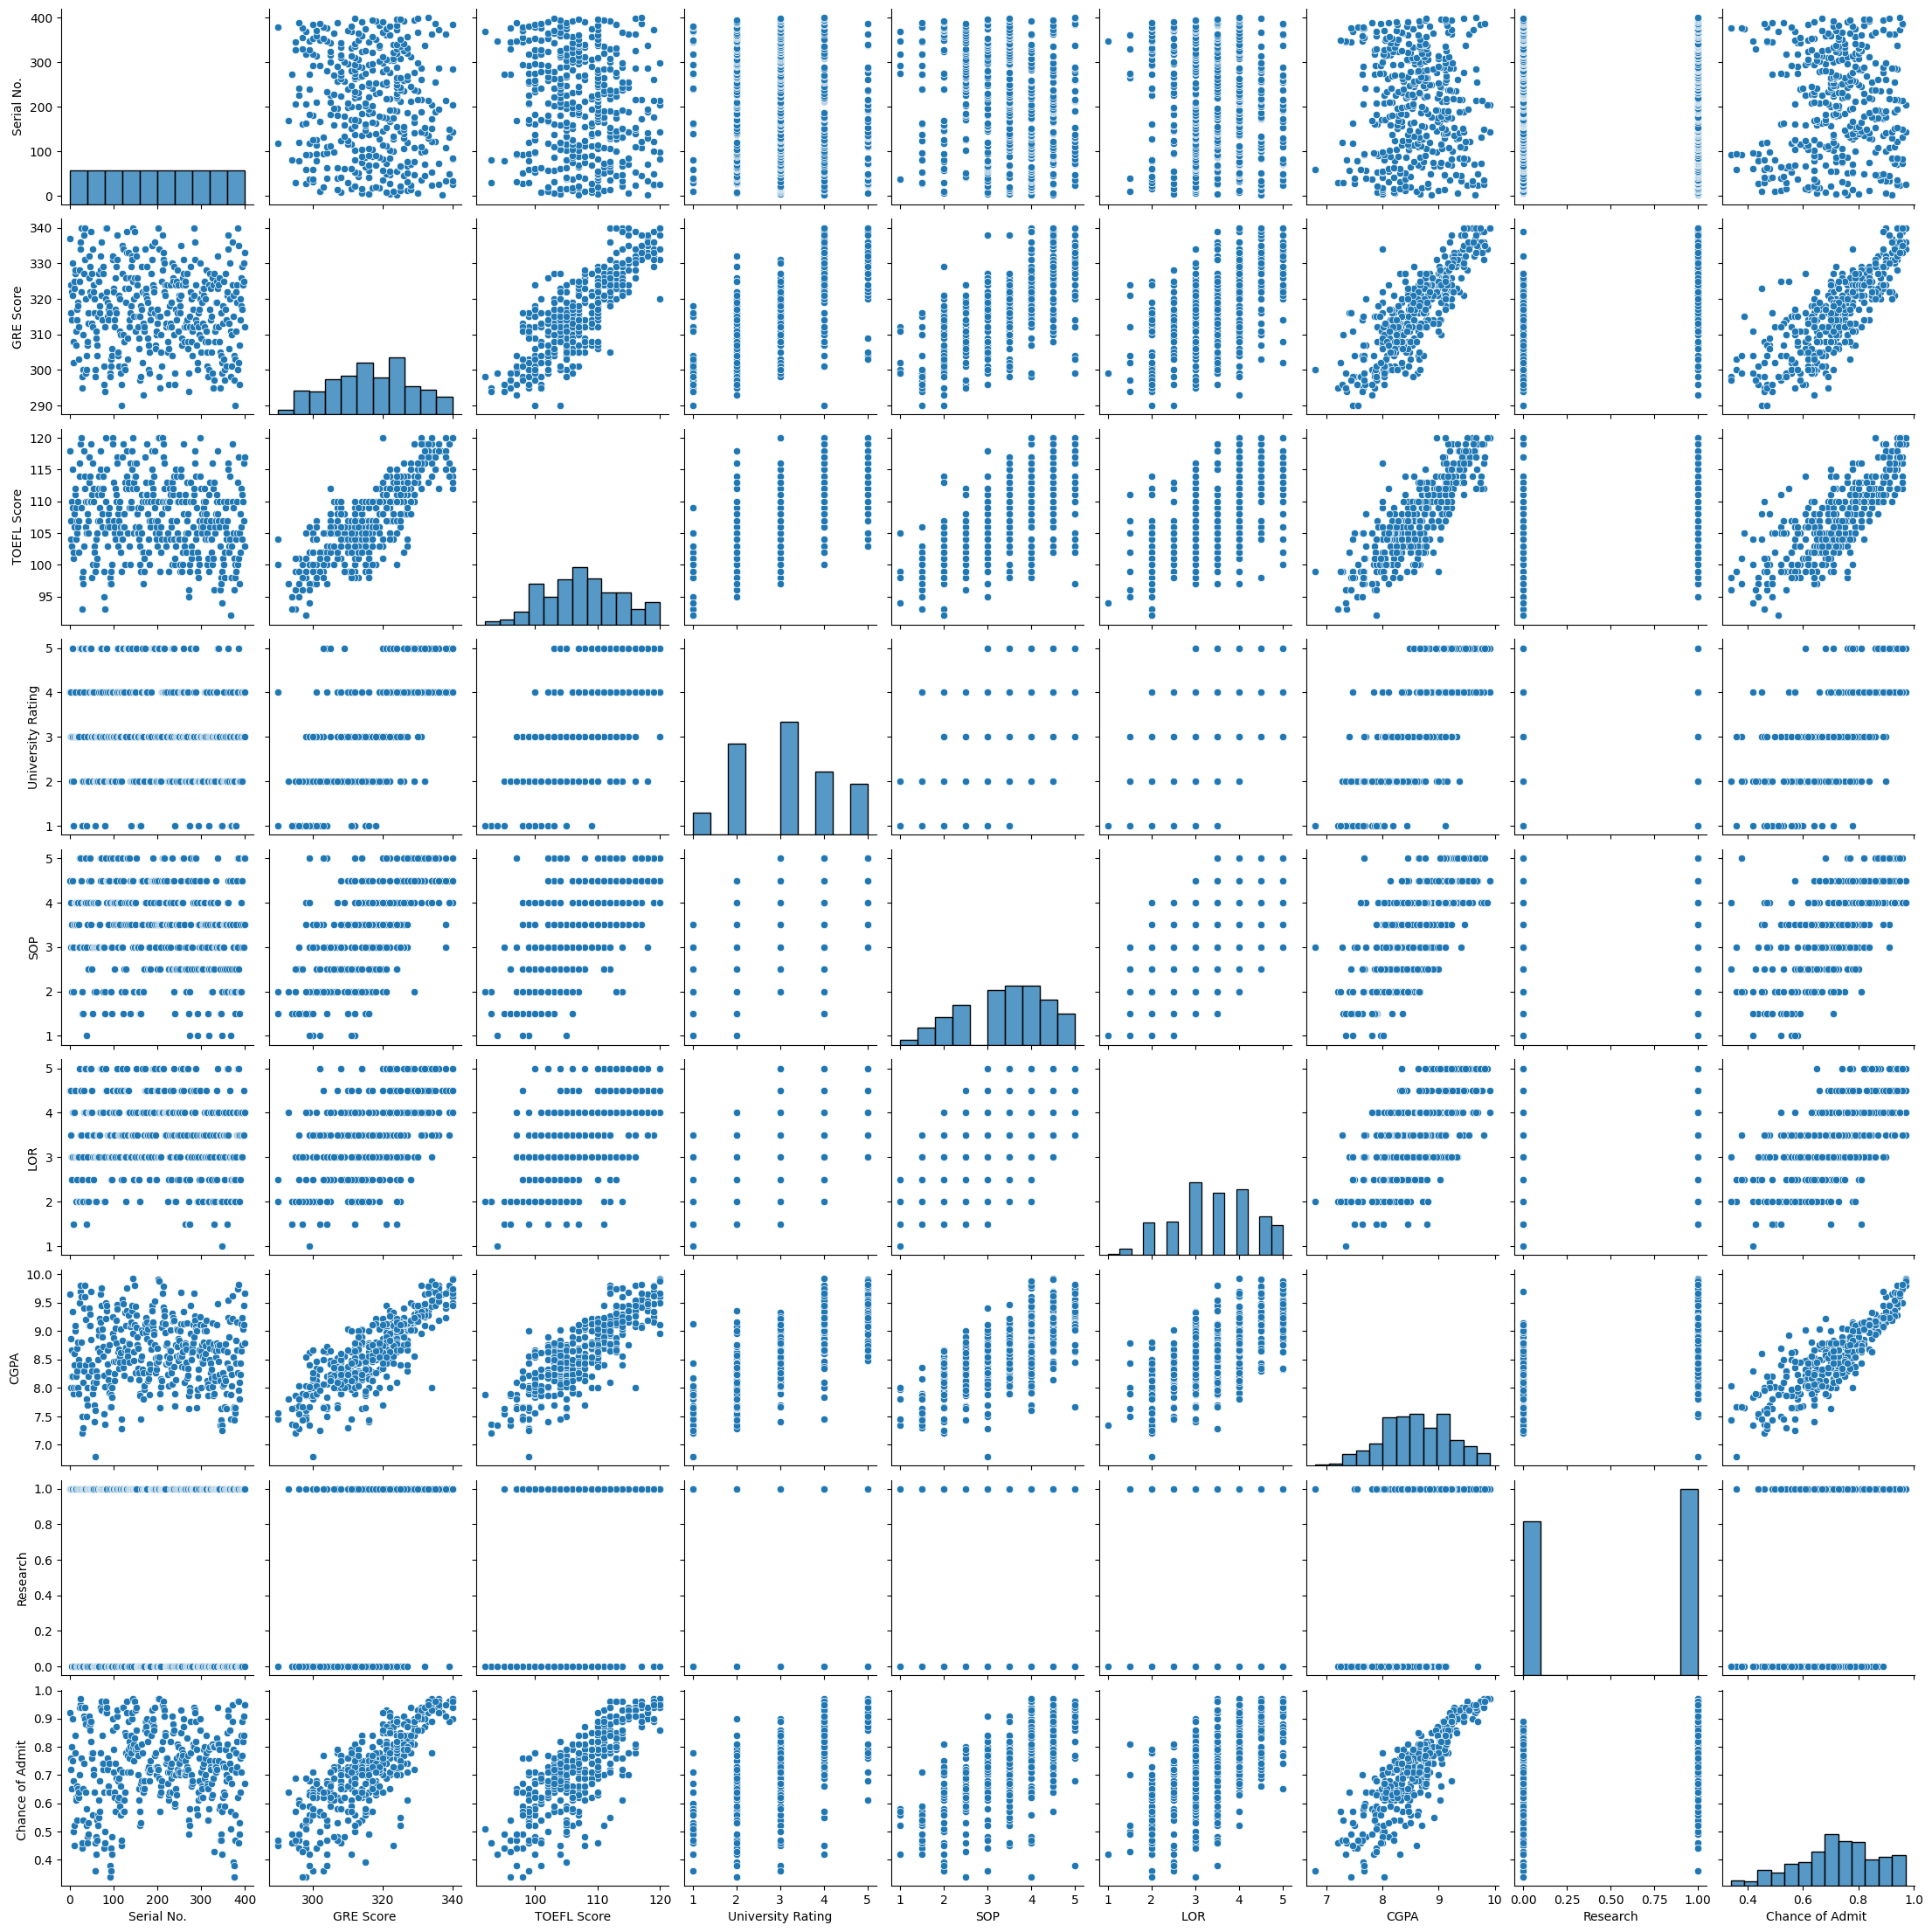

In [11]:
import seaborn as sns
sns.pairplot(df)

<Axes: >

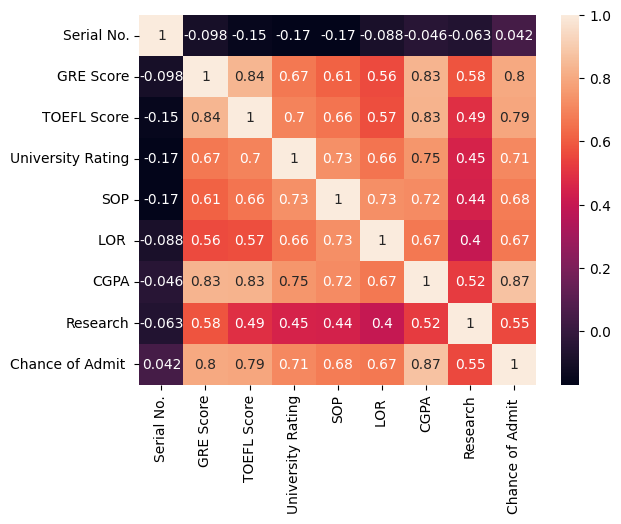

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
import numpy as np
df['Chance of Admit ']=np.where(df['Chance of Admit ']>=0.85,1,0)

In [14]:
df['Chance of Admit '].value_counts()

Chance of Admit 
0    311
1     89
Name: count, dtype: int64

In [15]:
df['Chance of Admit '].head()

0    1
1    0
2    0
3    0
4    0
Name: Chance of Admit , dtype: int64

In [16]:
x=df.drop(['Chance of Admit ','Serial No.'],axis=1)
y=df['Chance of Admit ']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [19]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
247,311,104,2,2.5,3.5,8.48,0
110,305,108,5,3.0,3.0,8.48,0
16,317,107,3,4.0,3.0,8.70,0
66,327,114,3,3.0,3.0,9.02,0
153,324,105,3,3.0,4.0,8.75,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [20]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
y_pred=model.predict(x_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [23]:
print(f"accuracy_score for gini for decision tree is : {accuracy_score(y_test,y_pred)}\n")
print(f"confusion_matrix for gini for decision tree is : {confusion_matrix(y_test,y_pred)}\n")
print(f"classification_report for gini for decision tree is : {classification_report(y_test,y_pred)}\n")

accuracy_score for gini for decision tree is : 0.96

confusion_matrix for gini for decision tree is : [[72  4]
 [ 0 24]]

classification_report for gini for decision tree is :               precision    recall  f1-score   support

           0       1.00      0.95      0.97        76
           1       0.86      1.00      0.92        24

    accuracy                           0.96       100
   macro avg       0.93      0.97      0.95       100
weighted avg       0.97      0.96      0.96       100




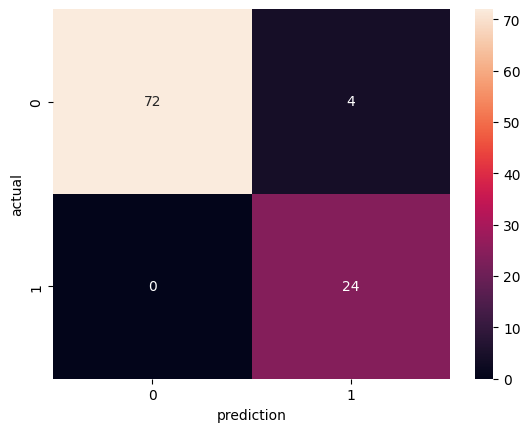

In [24]:
from matplotlib import pyplot as plt
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel("prediction")
plt.ylabel('actual')
plt.show()

In [25]:
print(model.criterion)

gini


In [26]:
model2=DecisionTreeClassifier(random_state=42,criterion='entropy')
model2.fit(x_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [27]:
y_pred1=model2.predict(x_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(f"accuracy_score for entropy for decision tree is : {accuracy_score(y_test,y_pred1)}\n")
print(f"confusion_matrix for entropy for decision tree is : {confusion_matrix(y_test,y_pred1)}\n")
print(f"classification_report for entropy for decision tree is : {classification_report(y_test,y_pred1)}\n")


accuracy_score for entropy for decision tree is : 0.96

confusion_matrix for entropy for decision tree is : [[72  4]
 [ 0 24]]

classification_report for entropy for decision tree is :               precision    recall  f1-score   support

           0       1.00      0.95      0.97        76
           1       0.86      1.00      0.92        24

    accuracy                           0.96       100
   macro avg       0.93      0.97      0.95       100
weighted avg       0.97      0.96      0.96       100




In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,0
4,5,314,103,2,2.0,3.0,8.21,0,0


In [ ]:
gre=int(input("enter gre score: \n"))
tofel=int(input("enter tofel score: \n"))
univ_rank=int(input("enter university rank: \n"))
sop=float(input("enter sop score: \n"))
lor=float(input("enter lor score: \n"))
cgpa=float(input("enter cgpa score: \n"))
research=int(input("enter research score for yes=1 no=0: \n"))
user_data=[[gre,tofel,univ_rank,sop,lor,cgpa,research]]
result=model.predict(user_data)
if result==1:   .
    print("you will be admitted")
else:
    print("you will not be admitted")


you will not be admitted


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
importances = model.feature_importances_
feature_names = x_train.columns
pd.DataFrame({"feature": feature_names, "importance": importances})

,feature,importance
0,GRE Score,0.097885
1,TOEFL Score,0.038342
2,University Rating,0.094040
3,SOP,0.009820
4,LOR,0.025568
5,CGPA,0.721253
6,Research,0.013093
